## AirBnB Assignment Part II Stub File

#### Guidelines

- Go through the data dictionary thoroughly before starting the assignment. That will give you a good idea of what each column represents before you begin the analysis.


- Read each instruction carefully, identify the task to be performed, and only then write the required code. The assignment is meant to be straightforward. You do not need to perform additional analyses that are not requested explicitly. However you are encouraged to perform a few additional analyses to get deeper into the insights


- Some of the tasks might require using functions you may not have used previously. In such cases, you should rely on the library documentation you referred to in the modules. Please understand that completing this assignment is a learning process, and research is part of it.


- Always run the cells of the Notebook sequentially, restart the kernel, and run all the cells to avoid runtime errors.


- For each of the tasks, there's a code cell where you are supposed to write the code and a markdown cell below it mentioning to either write the answer or mention your observations/insights from the output of the code.


- Many of the questions will require you to view them from multiple angles. You have been asked to **observe any trends in the visualizations and provide insights for these trends**. In other words, there will be no fixed answers. You are expected to apply your problem-solving skills to come up with solutions and also document your work appropriately; both of these are part of the assignment grading.

In [ ]:
##Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Load the dataset
df = pd.read_csv("/content/airbnblistings (1).csv")

In [ ]:
#check the top 5 rows
df.head()

,id,name,host_id,host_name,host_since_Year,neighbourhood,latitude,longitude,room_type,price,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,accommodates,bedrooms
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2008,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,49,...,2022-06-01,4.89,4.93,5.00,4.97,4.98,4.69,4.82,2,1.0
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,2009,Centrum-Oost,52.36407,4.89393,Private room,106,...,2020-04-09,4.44,4.69,4.79,4.63,4.62,4.87,4.49,2,1.0
2,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,2010,Centrum-West,52.38761,4.89188,Private room,126,...,2022-04-24,4.94,4.92,4.95,4.95,4.92,4.89,4.79,2,1.0
3,28871,Comfortable double room,124245,Edwin,2010,Centrum-West,52.36775,4.89092,Private room,75,...,2022-06-04,4.88,4.95,4.90,4.96,4.94,4.97,4.83,2,1.0
4,29051,Comfortable single room,124245,Edwin,2010,Centrum-Oost,52.36584,4.89111,Private room,55,...,2022-06-02,4.79,4.88,4.84,4.92,4.91,4.87,4.76,1,1.0


### Task 1 
Basic Descriptive Statistics 
- 1.1 How many AirBnB listings are there in the city of Amsterdam?

In [ ]:
##Write your code here
df['id'].count()

6173

**Answer**: There are a total of six thousand one hundred and seventy three (6,173) AirBnB listings in the city of Amsterdam as of July 2022. 

- 1.2 What is the average price of all the AirBnB listings in Amsterdam?

In [ ]:
##Write your code here
df['price'].describe()

count    6173.000000
mean      198.019601
std       140.546979
min         0.000000
25%       115.000000
50%       160.000000
75%       240.000000
max      2500.000000
Name: price, dtype: float64

**Answer**: The average price for all AirBnB listings in the city of Amsterdam is 198.02 units of the local currency.

- 1.3 - What is the average rating received by all the AirBnB listings in Amsterdam? *Hint* - Use the `review_scores_rating` column for answering this question

In [ ]:
##Write your code here
round(df['review_scores_rating'].mean(), 3)

4.801

**Answer**: The mean rating for the six thousand one hundred and seventy three lissting is 4.8 on a scale of zero to five. 

### Task 2

Plot a histogram for the following variables and observe their distribution. Choose the parameters like bin width, number of bins, etc. as per your choice.

- `price`
- `number_of_reviews`
- `review_scores_rating`

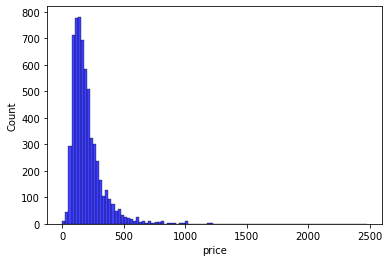

In [ ]:
##Write your code here for plotting the distribution of price

bin_start = 0
bin_end = 2500
bin_width = 25

ax = sns.histplot(df['price'], color="blue", bins=range(bin_start, bin_end, bin_width))



**Observation**: The distribution of price is highly right skewed. The data does include observations that have zero price. 

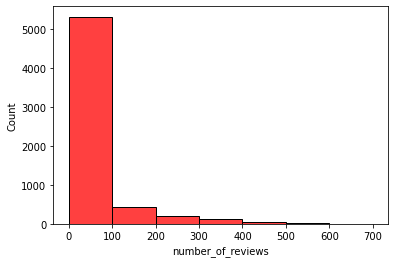

In [ ]:
##Write your code here for plotting the distribution of reviews

bin_start = 0
bin_end = 800
bin_width = 100

ax = sns.histplot(df['number_of_reviews'], color="red", bins= range(bin_start, bin_end, bin_width))


**Observation**: The distribution of the number of reviews is highly right skewed. The majority of the number of reviews for each listing is between zero and one hundred. 

Text(0.5, 0, 'Reviews Scale:0-5')

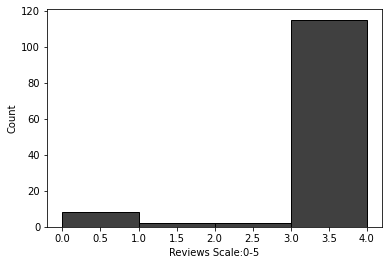

In [ ]:
##Write your code here for plotting the distribution of ratings
bin_start = 0
bin_end = 5
bin_width = 1

ax = sns.histplot(df['review_scores_rating'], bins= range(bin_start, bin_end, bin_width), color = 'black')
plt.xlabel("Reviews Scale:0-5")

**Observation**: The distribution of the review scores rating is highly right skewed. The majority of the review scores are between three and four. 

### Task 3

Plot a visualization to show the number of listings for each `room_type`

Which `room_type` has the highest number of listings?

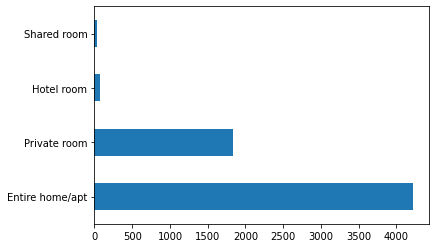

In [ ]:
ax = df['room_type'].value_counts().plot(kind='barh')



**Observation** - The two largest categories of room type are private rooms and listings that offer an entire home or apartment. 

### Task 4

You want to observe the relationship between the reviews(given by `number_of_reviews`) and the ratings received (`review_scores_rating`) by different AirBnB listings.

For this, plot both a scatterplot and a jointplot. What can you say about the relationship between ratings and reviews?

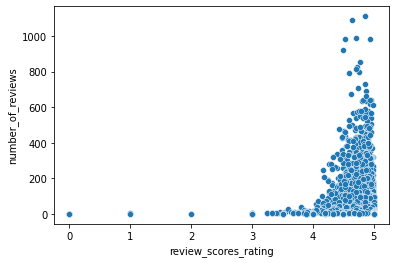

In [ ]:
##Write your code here for scatterplot
sns.scatterplot(data=df, y='number_of_reviews', x='review_scores_rating')

Text(27.125, 0.5, 'Number of Reviews')

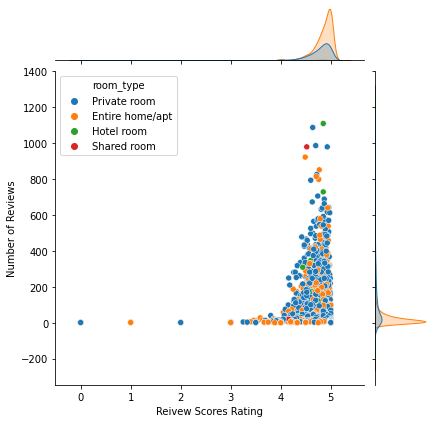

In [ ]:
##Write your code here for jointplot
h = sns.jointplot(data=df, y='number_of_reviews', x='review_scores_rating', hue="room_type")
h.ax_joint.set_xlabel('Reivew Scores Rating')
h.ax_joint.set_ylabel('Number of Reviews')

**Observation** - The number of reviews is significantly negatively correlated with the review scores rating. However, this correlation is weak and not obvious through visual inspection. 

### Task 5

AirBnB has been adding quite a few listings in the city of Amseterdam since they started operating in 2008. Plot a lineplot to observe how the average `review_scores_rating` has changed across the different years (use `host_since_Year` column) AirBnB has been operating in the city.

Text(0, 0.5, 'Review Scores Ratings')

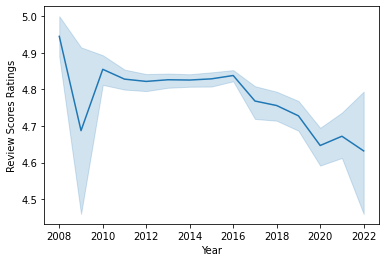

In [ ]:
### Write your code for lineplot here
ax = sns.lineplot(data=df, y='review_scores_rating', x='host_since_Year')
plt.xlabel("Year")
plt.ylabel("Review Scores Ratings")

**Observation** - The review scores rating increased from 2008 to 2010.They remained relatively constant for approximately six years. In 2016, the ratings began to decrease until 2020. In the year 2020 to 2021, the review scores rating increased and the declined again from 2021 to 2022.

### Task 6

You wish to identify the relationship between the various ratings each of the listing has received from the customers.
These ratings have been summarized below:

In [ ]:
review_columns = ['review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']



Plot a heatmap of the correlation matrix of the above ratings variables and document your observations. You can use this link to understand these variables further - https://www.airbnb.co.in/help/article/1257/star-ratings

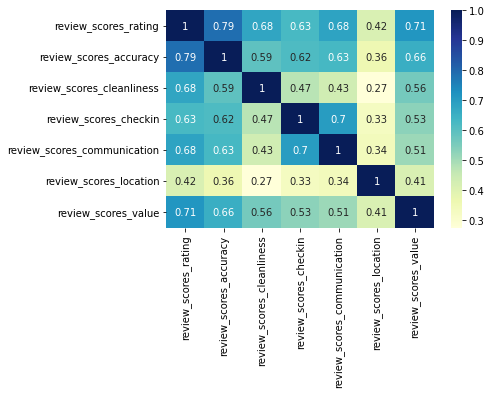

In [ ]:
sns.heatmap(df[review_columns].corr(), cmap="YlGnBu", annot=True)


**Observation** - There is a moderate to strong positive correlation between all of the variables with one another with the exception of review scores location. The correlation between review scores location and each of the other variables is positive, weak and nominally moderate. There is nominally moderate posititve correlation between review scores cleaninginless and review scores checkin and review scores cleaningliness and review scores communication.

### Task 7 

Analyze the listings' prices across the following neighborhoods using a categorical boxplot
- 'Westerpark', 'Oud-Noord', 'Noord-West','Zuid'

In [ ]:
nc = ['Westerpark', 'Oud-Noord', 'Noord-West','Zuid']

In [ ]:
### Write your code for subsetting the data for only the above neighborhoods here
df1 = df.loc[df['neighbourhood'].isin(nc)]
df1.shape

(1216, 22)

<Figure size 864x216 with 0 Axes>

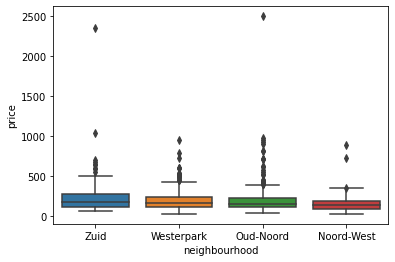

<Figure size 864x216 with 0 Axes>

In [ ]:
### Write your code for plotting the categorical boxplot here
ax = sns.boxplot(x='neighbourhood', y = 'price', data=df1)
plt.figure(figsize=(12,3))

**Observation** - The median prices for all four neighborhoods are well below 500 units of the local currency. Howewver, as demonstrated in the boxplot, there are a significant number outliers for each neighborhood. 